# Natural Language Processing
 - On va appliquer un apprentissage supervisé sur un fichier de données contenant les "feedback clients" d'un restaurant

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as ply

In [2]:
#Changement des données textuelles
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t',quoting = 3)

print(df.shape)
print(df.columns)

(1000, 2)
Index(['Review', 'Liked'], dtype='object')


In [3]:
!head Restaurant_Reviews.tsv

- but: Preparation des données textuelles

-1 -Il faut nettoyer les phrases en supprimant les signes de ponctuation et autres caractères exemple @RT,...?!

-2 -Il faut transformer toutes les lettres en minuscules

-3 -Il faut decomposer les phrases en entité(mots)

-4 -IL faut supprimer les stopwords

-5 -Il faut renvoyer chaque mot à son origine ou sa racine

-6 -On frabrique notre CORPUS

In [6]:
# Chargement des modules nécessaire pour nettoyer des données textuelles
import re #regular expression
import nltk #natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/bob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [30]:
print(stopwords.words("english")) #mot qui ne contient pas beaucoup des informations

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
df.head(n=5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [67]:
df.iloc[0,0]

'Wow... Loved this place.'

In [11]:
df.values[0,0]

'Wow... Loved this place.'

In [16]:
phrase_brute = df.iloc[0,0]

In [17]:
phrase_brute

'Wow... Loved this place.'

In [19]:
# Etape 1 nettoyage ,re = regular expression
phrase_brute = re.sub("[^a-zA-Z]"," ", phrase_brute)#remplacement des autre caractere que a-z par espace

In [20]:
phrase_brute

'Wow    Loved this place '

In [21]:
type(phrase_brute)

str

In [22]:
#etape 2
phrase_brute.lower()

'wow    loved this place '

In [23]:
#etape 3
phrase_brute = phrase_brute.split()#param a l'exeption ,decoupage

In [24]:
phrase_brute

['Wow', 'Loved', 'this', 'place']

In [26]:
for word in phrase_brute:
    print(word)

Wow
Loved
this
place


In [27]:
#4 Il faut supprimer les stop words 
# & 
# etape 5 Il faut renvoyer chaque mot à son origine
from nltk.stem.porter import PorterStemmer #permet de renvoyer chaque mots a sa racine(conjugué a l' infinitif)
ps = PorterStemmer()

phrase_propre = []
for word in phrase_brute:
    if word not in set(stopwords.words("english")):
        phrase_propre.append(ps.stem(word))
print(phrase_propre)

['wow', 'love', 'place']


In [37]:
phrase_propre = [ps.stem(word) for word in phrase_brute if not word in set(stopwords.words("english"))]

In [38]:
phrase_propre

['wow', 'love', 'place']

In [39]:
#Derniere etape construction du corpus
phrase_propre = " ".join(phrase_propre)#mise en chaine de caractere

In [40]:
df.iloc[0,0]

'Wow... Loved this place.'

In [41]:
phrase_propre

'wow love place'

In [42]:
#application sur toute les phrases
corpus = []
for i in range(1000):
    review =  re.sub("[^a-zA-Z]"," ",df.iloc[i,0])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [45]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [46]:
# encodage des données textuelles presentes dans le corpus
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit_transform(corpus)


<1000x1565 sparse matrix of type '<class 'numpy.int64'>'
	with 5372 stored elements in Compressed Sparse Row format>

In [49]:
X = cv.fit_transform(corpus).toarray()

In [50]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
y = df.iloc[:,-1]

In [62]:
df.iloc[:,-1] #imprime toute les ligne du dernier colone

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [52]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [64]:
Xdf = pd.DataFrame(data = X ,columns = cv.get_feature_names() )
ydf = pd.DataFrame(data = y.values ,columns = ["Target"])

df1 = pd.concat([Xdf,ydf],axis = 1)
df1 #par ordre alphabetique

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df1["love"]

0      1
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: love, Length: 1000, dtype: int64

In [96]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [97]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
absolut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accommod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accomod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yukon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yummi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df1.iloc[:,0:-1]#toute les lignes de 0 jusqu a l'avant dernier colone
y = df1.iloc[:,-1]#toute les lignes dernier colone

from sklearn.model_selection import train_test_split
X_train,X_test ,y_train ,y_test = train_test_split(X,y,train_size = 0.8,random_state = 1)

In [69]:
X.shape

(1000, 1565)

In [71]:
#Modelisation avec l'algorithme random forest
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
model = RandomForestClassifier()
svm = SVC()
ab = AdaBoostClassifier()

In [72]:
# Entrainement du model RandomForestClassifier
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.77

In [73]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.795

In [74]:
ab.fit(X_train,y_train)
ab.score(X_test,y_test)

0.78

In [101]:
y_predRF = model.predict(X_test)

In [132]:
# Entrainement du model SVM
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.795

In [103]:
y_predSVC = svm.predict(X_test)

In [104]:
# Entrainement du model Ab
ab.fit(X_train,y_train)
ab.score(X_test,y_test)

0.78

In [105]:
y_predab = ab.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test,y_predRF)

array([[92, 16],
       [33, 59]])

In [108]:
confusion_matrix(y_test,y_predab)

array([[100,   8],
       [ 36,  56]])

In [109]:
confusion_matrix(y_test,y_predSVC)

array([[96, 12],
       [29, 63]])

<AxesSubplot:>

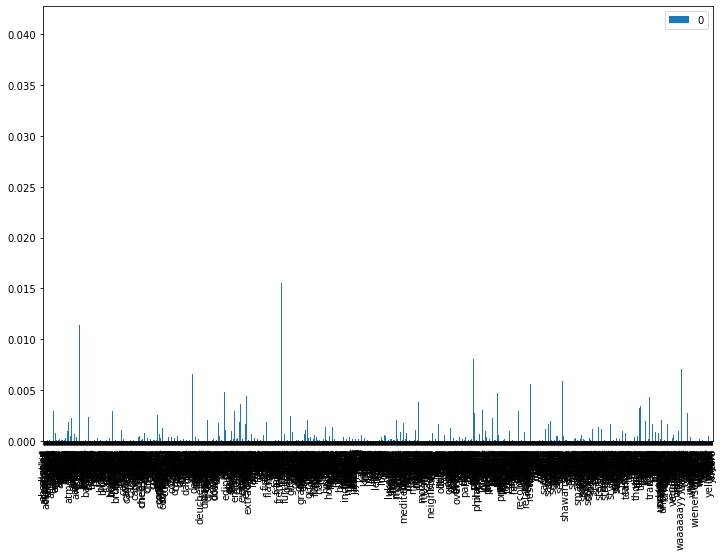

In [75]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8)) #variable le plus important

In [95]:
phrase_test = "the dinner was great , i like the restaurant"

In [96]:
x_phrase_test = cv.transform([phrase_test]).toarray()

In [97]:
x_phrase_test.sum()

3

In [98]:
x_phrase_test.shape

(1, 1565)

In [100]:
model.predict(x_phrase_test)#un boncommentaire

array([1])

In [121]:
model.predict_proba(x_phrase_test)

array([[0.1, 0.9]])

# Autre evaluation

In [126]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve #model en overfitting ou underfitting
import matplotlib.pyplot as plt

In [123]:
def evaluation(model,name):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    #N nombre d'echantillon
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title(name)

[[94 14]
 [33 59]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       108
           1       0.81      0.64      0.72        92

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



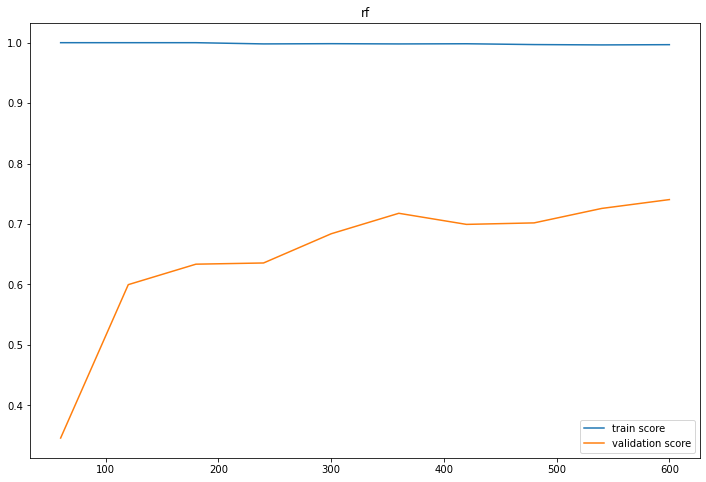

In [127]:
evaluation(model,"rf")

## OPTIMISATION

In [166]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [152]:
hyper_params = {'svc__gamma':[1e-3, 1e-4],#, 0.0005
                
               }

In [153]:
svm

SVC()

In [171]:
grid = cross_val_score(svm, X_train, y_train, scoring='recall', cv=4)

In [175]:
grid.fit(X_test,y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'